In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords #nltk natural language tool kit
from wordcloud import WordCloud

import string


##import plotly.express as px

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


from collections import Counter


In [4]:
# !pip install plotly

In [5]:
df = pd.read_csv('spam_email.csv',encoding = 'iso-8859-1')

In [6]:
df

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
6041,6041,empty,0
6042,6042,___ ___ ...,0
6043,6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,6044,empty,0


In [7]:
df.shape

(6046, 3)

## 1. Data Cleaning

In [8]:
df.columns

Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [11]:
email = df[df.Label == 1]

In [12]:
email = email.loc[:,["Label","Body"]]

In [13]:
email

,Label,Body
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...
3,1,##############################################...
4,1,I thought you might like these:\n1) Slim Down ...
...,...,...
1891,1,\nWant To Be Your Own Boss? ÃÂ Train Now Wit...
1892,1,empty
1893,1,"Dear Subscriber,If I could show you a way to g..."
1894,1,****Mid-Summer Customer Appreciation SALE!****...


In [14]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, 0 to 1895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1896 non-null   int64 
 1   Body    1891 non-null   object
dtypes: int64(1), object(1)
memory usage: 44.4+ KB


In [15]:
# missing values
df.isnull().sum()

Body     10
Label     0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Body     0
Label    0
dtype: int64

In [18]:
df.shape

(6036, 2)

In [19]:
# check for duplicate values
df.duplicated().sum()

772

In [20]:
# remove duplicates 
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5264, 2)

## 2. EDA (Exploratory Data Analysis)

In [23]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [24]:
df['Label'].value_counts()

Label
0    3908
1    1356
Name: count, dtype: int64

**0 --> Ham**

**1--> Spam**

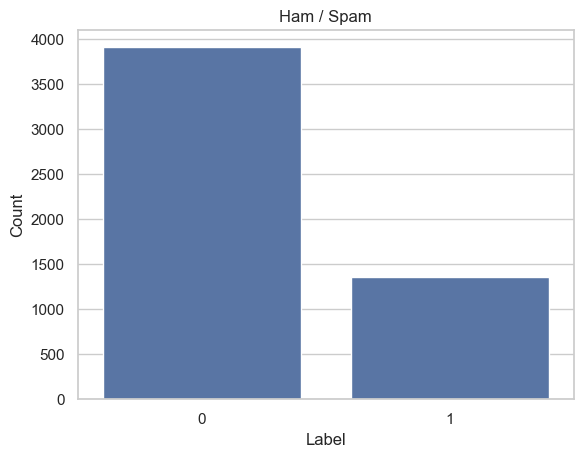

In [25]:
sns.set_theme(style='whitegrid')
bar = sns.countplot(x='Label',data=df)
bar.set(ylabel = 'Count',title = 'Ham / Spam')
plt.show()

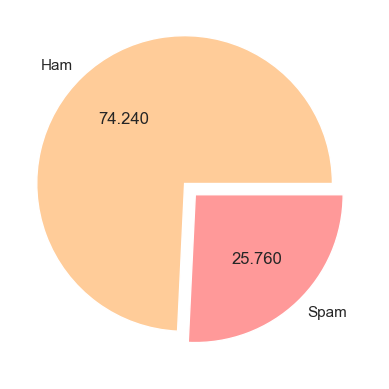

In [26]:
plt.pie(df.groupby('Label').size(), labels = ['Ham','Spam'],autopct= '%0.3f',
        colors = ['#ffcc99','#ff9999'],explode= [0.1,0.005]);

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aman
[nltk_data]     Rajput\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
ps = PorterStemmer()

In [30]:
def basic_clean(x) :
    words = word_tokenize(x.lower())
    final = []
    
    #x = x.replace('\n', ' ').replace('\r', '')
    for word in words :     
        if word.isalnum():
            final.append(word)
    words = final[:]
    final= []
    
    for i in words :
        if i not in stop_words and i not in string.punctuation :
            final.append(i)
    words = final[:]
    final= []
    
    for i in words :
        final.append(ps.stem(i))
    words = final[:]
    final= []
    return ' '.join(words)

In [31]:
basic_clean(df['Body'][1])

'1 fight risk cancer http slim guarante lose lb 30 day http get child support deserv free legal advic http join web fastest grow singl commun http start privat photo album onlin http wonder day offer manag prizemamaif wish leav list pleas use link http ilug 7c17 7c114258 irish linux user group ilug http un subscript inform list maintain listmast'

In [32]:
df['clean_text'] = df['Body'].apply(lambda x : basic_clean(str(x)))

C:\Users\Aman Rajput\AppData\Local\Temp\ipykernel_22564\856887697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['Body'].apply(lambda x : basic_clean(str(x)))


In [33]:
df.head()

,Body,Label,clean_text
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guarante lose lb 30 ...


In [34]:
# Word Cloud for Spam messages

body = ''.join(df[df['Label'] == 1]['clean_text'])
wc = WordCloud(width = 500 , height = 500).generate(body)


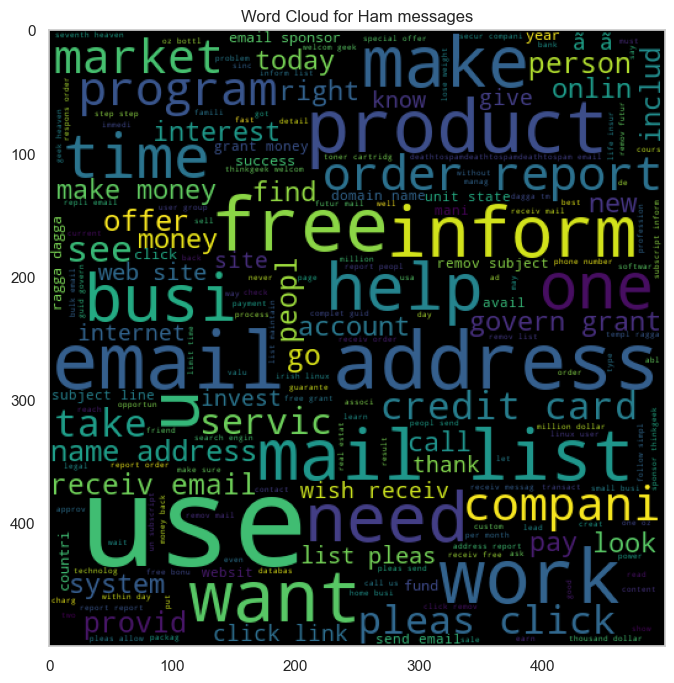

In [35]:
# Word Cloud for Ham messages

body = ''.join(df[df['Label'] == 1]['clean_text'])
wc = WordCloud(width = 500 , height = 500).generate(body)
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Word Cloud for Ham messages")
plt.imshow(wc)
plt.grid(False)
plt.show()

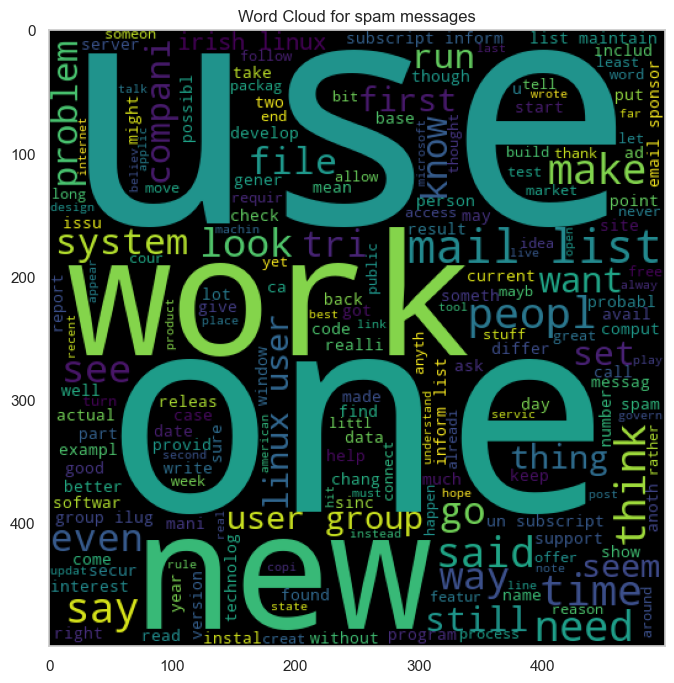

In [36]:
# Word Cloud for Spam messages

body = ''.join(df[df['Label'] == 0]['clean_text'])
wc = WordCloud(width = 500 , height = 500).generate(body)
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Word Cloud for spam messages")
plt.imshow(wc)
plt.grid(False)
plt.show()

In [37]:
df.head()

,Body,Label,clean_text
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guarante lose lb 30 ...


In [38]:
spam_corpus = []

for msg in df[df.Label == 1]['clean_text'].tolist():
    for word in msg.split():
        
        spam_corpus.append(word)
        
ham_corpus = []

for msg in df[df.Label == 0]['clean_text'].tolist():
    for word in msg.split():
        
        ham_corpus.append(word)

In [39]:
len(spam_corpus) , len(ham_corpus)

(225109, 500741)

In [40]:
spam_30 = Counter(spam_corpus).most_common(30)
ham_30 = Counter(ham_corpus).most_common(30)

In [41]:
spam_keys = []
spam_values = []
for item in spam_30:
    spam_keys.append(item[0])
    spam_values.append(item[1])

In [42]:
ham_keys = []
ham_values = []
for item in ham_30:
    ham_keys.append(item[0])
    ham_values.append(item[1])

C:\Users\Aman Rajput\AppData\Local\Temp\ipykernel_22564\1344758737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = spam_keys,y = spam_values, palette= palette_color)
C:\Users\Aman Rajput\AppData\Local\Temp\ipykernel_22564\1344758737.py:2: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = spam_keys,y = spam_values, palette= palette_color)


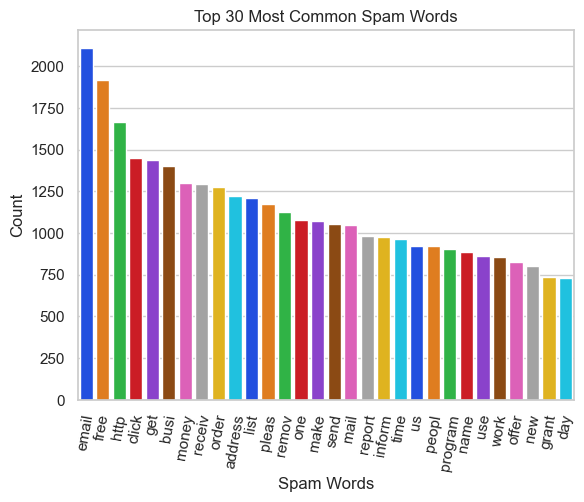

In [43]:
palette_color = sns.color_palette('bright')
ax = sns.barplot(x = spam_keys,y = spam_values, palette= palette_color)
plt.title('Top 30 Most Common Spam Words')
plt.xlabel('Spam Words')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

In [44]:
df['words'] = df['Body'].apply(lambda x : len(word_tokenize(str(x))))

C:\Users\Aman Rajput\AppData\Local\Temp\ipykernel_22564\1700221753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['Body'].apply(lambda x : len(word_tokenize(str(x))))


In [45]:
df['words'].describe()

count    5264.000000
mean      340.315160
std       560.646316
min         0.000000
25%       105.000000
50%       191.000000
75%       343.000000
max      8030.000000
Name: words, dtype: float64

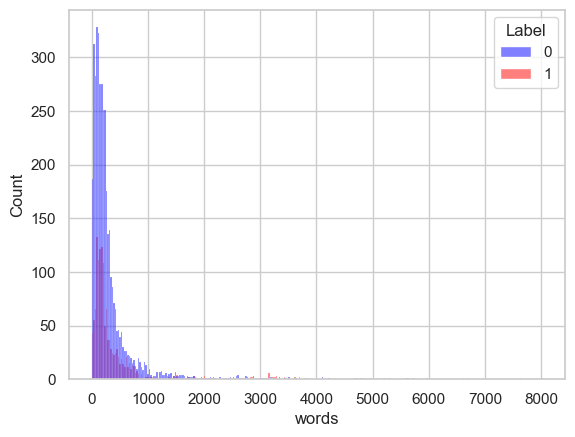

In [46]:
sns.histplot(data=df,x=df['words'],hue='Label',palette=['blue','red']);

## 4. Model Building

In [47]:
df

,Body,Label,clean_text,words
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insur spend life quot save ensur ...,191
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...,139
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...,113
3,##############################################...,1,adult club offer free membership instant acces...,690
4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guarante lose lb 30 ...,108
...,...,...,...,...
6033,----------------------------------------------...,0,isilo tm palm os pocket pc window enter beta1 ...,1872
6034,"EFFector Vol. 15, No. 35 November ...",0,effector vol 15 35 novemb 8 2002 ren public el...,1818
6039,\nWe have extended our Free seat sale until Th...,0,extend free seat sale thursday 21st novemb det...,559
6042,___ ___ ...,0,insignific matter heavili overemphasis hugh mt...,3092


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
#tfidf = TfidfVectorizer()
#from sklearn.preprocessing import MinMaxScaler
#scalar = MinMaxScaler()
#X = scalar.fit_transform(X)

In [49]:
X = tfidf.fit_transform(df['clean_text']).toarray()
#from sklearn.preprocessing import MinMaxScaler
#scalar = MinMaxScaler()
#X = scalar.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03556731, ..., 0.        , 0.        ,
        0.        ]])

In [50]:
X.shape

(5264, 3000)

In [51]:
y = df['Label'].values

In [52]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [55]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC':svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9791073124406457, 0.9852941176470589)

In [59]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print('Precision - ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9791073124406457
Precision -  0.9852941176470589
For  KN
Accuracy -  0.8983855650522318
Precision -  0.7386666666666667
For  NB
Accuracy -  0.9639126305792972
Precision -  0.9881889763779528
For  DT
Accuracy -  0.9164292497625831
Precision -  0.8639705882352942
For  LR
Accuracy -  0.9620132953466287
Precision -  0.9730769230769231
For  RF
Accuracy -  0.9743589743589743
Precision -  0.9675090252707581
For  AdaBoost
Accuracy -  0.9544159544159544
Precision -  0.9440298507462687
For  BgC
Accuracy -  0.9591642924976258
Precision -  0.9293286219081273
For  ETC
Accuracy -  0.9810066476733144
Precision -  0.9854014598540146
For  GBDT
Accuracy -  0.9477682811016145
Precision -  0.9565217391304348


In [60]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),
    'Accuracy':accuracy_scores,"Precision":precision_scores})

In [61]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.979107,0.985294
1,KN,0.898386,0.738667
2,NB,0.963913,0.988189
3,DT,0.916429,0.863971
4,LR,0.962013,0.973077
5,RF,0.974359,0.967509
6,AdaBoost,0.954416,0.944030
7,BgC,0.959164,0.929329
8,ETC,0.981007,0.985401
9,GBDT,0.947768,0.956522


In [62]:
performance_df.sort_values(["Precision"],ascending= False)

,Algorithm,Accuracy,Precision
2,NB,0.963913,0.988189
8,ETC,0.981007,0.985401
0,SVC,0.979107,0.985294
4,LR,0.962013,0.973077
5,RF,0.974359,0.967509
9,GBDT,0.947768,0.956522
6,AdaBoost,0.954416,0.944030
7,BgC,0.959164,0.929329
3,DT,0.916429,0.863971
1,KN,0.898386,0.738667


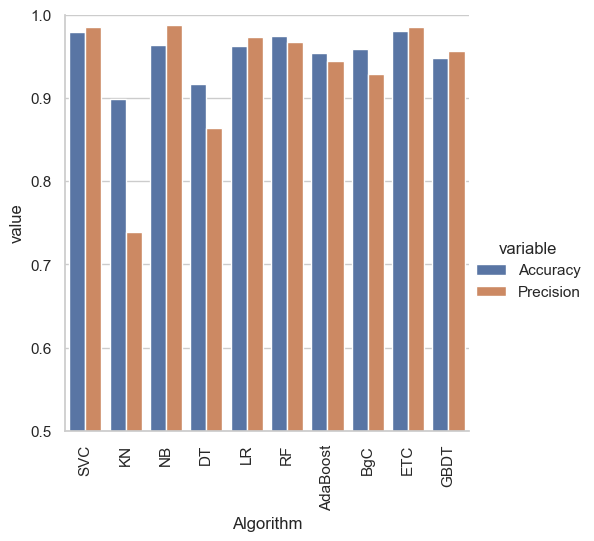

In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)\

print("accuracy_score : ",accuracy_score(y_test,y_pred1))
print("precision_score :",precision_score(y_test,y_pred1))
print("confusion_matrix :-\n",confusion_matrix(y_test,y_pred1))

accuracy_score :  0.9420702754036088
precision_score : 0.9032258064516129
confusion_matrix :-
 [[740  27]
 [ 34 252]]


In [66]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)\

print("accuracy_score : ",accuracy_score(y_test,y_pred1))
print("precision_score :",precision_score(y_test,y_pred1))
print("confusion_matrix :-\n",confusion_matrix(y_test,y_pred1))

accuracy_score :  0.9639126305792972
precision_score : 0.9881889763779528
confusion_matrix :-
 [[764   3]
 [ 35 251]]


In [67]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)\

print("accuracy_score : ",accuracy_score(y_test,y_pred1))
print("precision_score :",precision_score(y_test,y_pred1))
print("confusion_matrix :-\n",confusion_matrix(y_test,y_pred1))

accuracy_score :  0.9249762583095916
precision_score : 0.9404255319148936
confusion_matrix :-
 [[753  14]
 [ 65 221]]


In [68]:
# model improve
# -->> Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
temp_df 

,Algorithm,Accuracy,Precision
0,SVC,0.979107,0.985294
1,KN,0.898386,0.738667
2,NB,0.963913,0.988189
3,DT,0.916429,0.863971
4,LR,0.962013,0.973077
5,RF,0.974359,0.967509
6,AdaBoost,0.954416,0.944030
7,BgC,0.959164,0.929329
8,ETC,0.981007,0.985401
9,GBDT,0.947768,0.956522


In [69]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))